In [3]:
#import library
import numpy as np
import pandas as pd

#to ensure we have consistent results
np.random.seed(42)

In [4]:
#Load the dataset
print('==> Loading the dataset...')
insurance=pd.read_csv("dataset2.csv")
print('done\n')

==> Loading the dataset...
done



In [5]:
#display dataset
insurance
#display first 5 rows
insurance.head()

,Agency Type,Distribution Channel,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,0,0,0,119.0,0,-27.0,9.570,55.0
1,0,0,0,119.0,0,-27.0,9.570,55.0
2,0,1,0,65.0,1,-27.0,28.875,32.0
3,0,1,0,60.0,1,-27.0,23.760,32.0
4,0,1,0,79.0,2,-19.8,11.880,41.0


In [6]:
#Split the data set into the input matrix and output vector
x= insurance.drop('Claim', axis=1)
y=insurance['Claim']

In [6]:
#display x 
#Dataset that have remove column Claim
x

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,0,0,0,0,86.5,0,-29.0,9.57,81.0
1,0,0,0,0,86.5,0,-29.0,9.57,71.0
2,1,0,1,1,65.0,1,-37.5,29.70,32.0
3,1,0,1,1,60.0,1,-37.5,23.76,32.0
4,1,0,1,1,79.0,2,-19.8,11.88,41.0
...,...,...,...,...,...,...,...,...,...
63321,2,1,1,3,86.5,10,35.0,12.25,31.0
63322,2,1,1,3,58.0,14,40.0,14.00,40.0
63323,2,1,1,3,2.0,0,18.0,6.30,57.0
63324,2,1,1,3,3.0,7,18.0,6.30,63.0


In [7]:
#display the vector y[what we want to predict]
#column 'Claim' only
y

0        0
1        0
2        0
3        0
4        0
        ..
63321    0
63322    0
63323    0
63324    0
63325    0
Name: Claim, Length: 63326, dtype: int64

In [24]:
a=0
for i in y:
    if i==1:
        a=a+1
print(a)

927


In [8]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 63326 entries, 0 to 63325
Series name: Claim
Non-Null Count  Dtype
--------------  -----
63326 non-null  int64
dtypes: int64(1)
memory usage: 494.9 KB


In [9]:
#Split the dataset into training and testing set
#80% training set
#20% test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=30)

In [10]:
#Standardize numeric data and normalize
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=False)
scaler.fit(x_train)
X_train=scaler.transform(x_train)

In [11]:
y_train = y_train.values;  #convert to numpy array
#print the total number of rows and column
print('x_train.shape:', x_train.shape) 
print('y_train shape:', y_train.shape)

x_train.shape: (50660, 7)
y_train shape: (50660,)


# SGD Classifier Model

In [12]:
from sklearn.linear_model import SGDClassifier
#use train dataset
sgd_clf=SGDClassifier(random_state=42, max_iter=5, tol=None)
sgd_clf.fit(x_train, y_train)

SGDClassifier(max_iter=5, random_state=42, tol=None)

In [13]:
y_pred=sgd_clf.predict(x_train)
#predict using the same training data
#y_train should be similar to y_predict
#predict value similar to the actual value

In [15]:
def show10results(y_train, y_pred):
    print('Result for the 10 random samples: ')
    selected = np.random.randint(0, len(y_train), 10)
    for i in selected:
        print('actual = {:7.0f} pred ={:7.0f}'.format(y_train[i], y_pred[i]))

y_pred=sgd_clf.predict(x_train)#predict
show10results(y_train, y_pred)

Result for the 10 random samples: 
actual =       0 pred =      0
actual =       0 pred =      0
actual =       0 pred =      0
actual =       0 pred =      0
actual =       0 pred =      0
actual =       0 pred =      0
actual =       0 pred =      0
actual =       0 pred =      0
actual =       0 pred =      0
actual =       0 pred =      0


In [16]:
#evaluating accuracy
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train, y_pred)
print("Training accuracy: {:.4f}".format(train_acc))

Training accuracy: 0.9860


In [18]:
#3 fold cross validation
from sklearn.model_selection import cross_val_score
k_scores=cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")
k_scores

array([0.98596554, 0.97933321, 0.98602393])

In [19]:
#check whether is skewed data
from sklearn.metrics import accuracy_score
y_train_pred = sgd_clf.predict(x_train) # make sure sgd_clf has been trained
print('Accuracy using prediction values:', accuracy_score(y_train, y_pred))
y_train_allfalse = np.zeros(len(y_train), dtype=bool)
print('Accuracy using prediction values:', accuracy_score(y_train, y_train_allfalse))

Accuracy using prediction values: 0.9859849980260561
Accuracy using prediction values: 0.9859849980260561


In [22]:
#predict the label for all training samples
from sklearn.model_selection import cross_val_predict
y_pred_cv = cross_val_predict (sgd_clf, X_train, y_train, cv=3)


In [23]:
#perform confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix (y_train, y_pred_cv)
print(cm)

[[49950     0]
 [  710     0]]


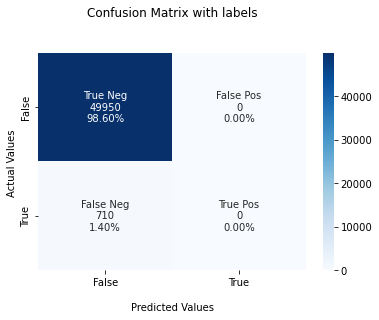

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
 cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
 cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
 zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision = {:.4f}'.format(precision_score(y_train, y_pred_cv)))
print('recall = {:.4f}'.format(recall_score (y_train, y_pred_cv)))
print('f1 score = {:.4f}'.format(f1_score(y_train, y_pred_cv)))

precision = 0.0000
recall = 0.0000
f1 score = 0.0000


C:\Users\shinj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
